# Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

### Loading the data 

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
df = train.append(test,sort=False)

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,1309.000000,891.000000,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307
unique,NaN,NaN,NaN,1307,2,NaN,NaN,NaN,929,NaN,186,3
top,NaN,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914
mean,655.000000,0.383838,2.294882,NaN,NaN,29.881138,0.498854,0.385027,NaN,33.295479,NaN,NaN
std,378.020061,0.486592,0.837836,NaN,NaN,14.413493,1.041658,0.865560,NaN,51.758668,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,328.000000,0.000000,2.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,655.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,982.000000,1.000000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Survived       891 non-null float64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


We have 418 missing values in the Survived column, we need to drop those.

In [7]:
df['Survived'] = df['Survived'].dropna()
df['Survived'].isnull().sum()

0

### Create a new column 'Has_Cabin' that tells you whether passengers had a cabin or not.

In [8]:
#To create a new column 'Has_Cabin' that tells you whether passengers had a cabin or not.
df['Has_Cabin'] = ~df['Cabin'].isnull()

In [9]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_Cabin
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False


### Create a new column “Title”, which will contain the titles of the passengers such as Mr., Mrs., etc.  

In [10]:
df['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [11]:
import re
df['Title'] = df.Name.apply(lambda title: re.search(' ([A-Z][a-z]+)\.', title).group(1))

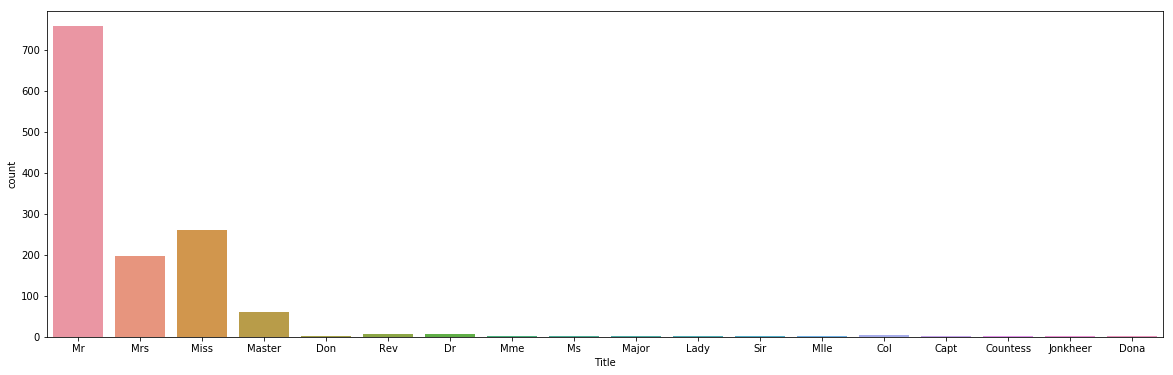

In [12]:
# Checking if we got only five titles or not.

plt.figure(figsize=(20,6))
sns.countplot(x='Title', data=df)

We need to change the rest of titles to one of these: Mr, Mrs, Master, Miss, and Special. 

In [13]:
#Mlle: The equivalent in English is "Miss". 
#Mme: Mrs
#Ms: Miss
df.Title = df['Title'].replace({'Mlle':'Miss', 'Mme':'Mrs', 'Ms':'Miss'})
df['Title'] = df['Title'].replace(['Don','Rev', 'Dr',
                                            'Major', 'Lady', 'Sir', 'Col', 'Capt', 'Countess', 'Jonkheer','Dona'],'Special')

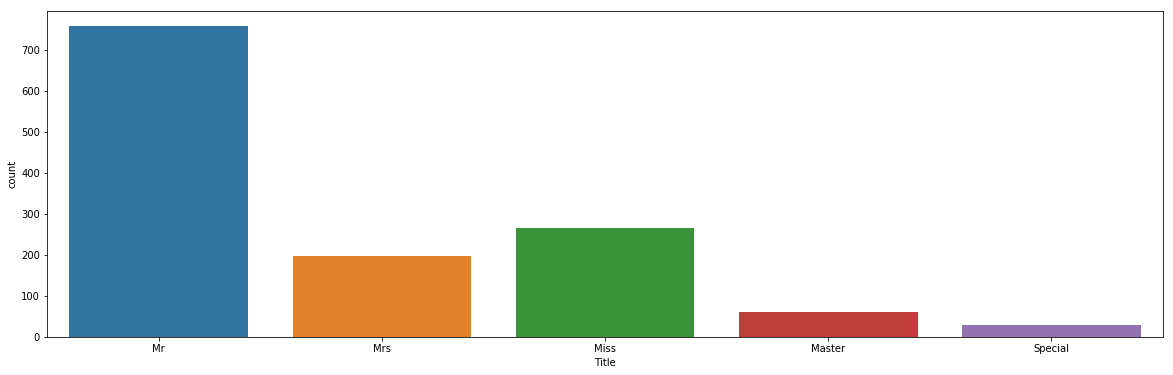

In [14]:
#Verifying changes
plt.figure(figsize=(20,6))
sns.countplot(x='Title', data=df)

## Checking and Handling missing values 

In [15]:
df.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
Has_Cabin         0
Title             0
dtype: int64

#### We can safely remove Cabin column since we have already extracted information whether a passengers has a cabin or not in the newly created Has_Cabin column.  

In [16]:
df.drop(['Cabin'], axis = 1, inplace = True)

In [17]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Has_Cabin,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,False,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,True,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,False,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,True,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,False,Mr


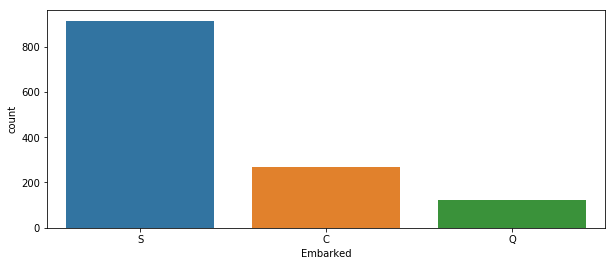

In [18]:
plt.figure(figsize=(10,4))
sns.countplot(x='Embarked', data=df)

#### Observation:
#### Most passengers embarked from 'S' i.e. Southampton. Thus, we can fill in the two missing values in the 'Embarked' column with 'S'.

In [19]:
df['Embarked'] = df['Embarked'].fillna('S')

#### We have one missing value of fare column, it is only reasonable to find the class of that passenger and then subsitute the central value for that class.  

In [20]:
df[df['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Has_Cabin,Title
152,1044,0.0,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S,False,Mr


Passenger Class is 3. 

In [21]:
df['Fare'] = df['Fare'].fillna(df['Fare'][df['Pclass']==3].median())

#### Handling missing values of Age column : with respect to titles. 

In [22]:
df[df['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Has_Cabin,Title
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q,False,Mr
17,18,1.0,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,S,False,Mr
19,20,1.0,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,C,False,Mrs
26,27,0.0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,C,False,Mr
28,29,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,Q,False,Miss
29,30,0.0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,S,False,Mr
31,32,1.0,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,C,True,Mrs
32,33,1.0,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,Q,False,Miss
36,37,1.0,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,C,False,Mr
42,43,0.0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,C,False,Mr


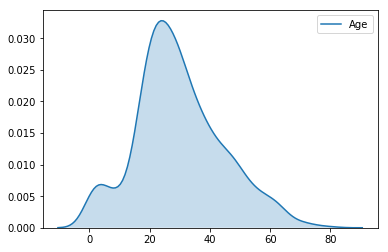

In [24]:
sns.kdeplot(df['Age'],shade = True)

In [25]:
#Storing median of each title in variables.
mr_median = df.Age[df.Title == 'Mr'].median()
mrs_median = df.Age[df.Title == 'Mrs'].median()
miss_median = df.Age[df.Title == 'Miss'].median()
master_median = df.Age[df.Title == 'Master'].median()
special_median = df.Age[df.Title == 'Special'].median()

In [26]:
#Now filling the missing values.
df.Age[df.Title =='Mr'] = df.Age[df.Title =='Mr'].fillna(mr_median)
df.Age[df.Title =='Mrs'] = df.Age[df.Title =='Mrs'].fillna(mrs_median)
df.Age[df.Title =='Miss'] = df.Age[df.Title =='Miss'].fillna(miss_median)
df.Age[df.Title =='Master'] = df.Age[df.Title =='Master'].fillna(master_median)
df.Age[df.Title =='Special'] = df.Age[df.Title =='Special'].fillna(special_median)

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\DELL\Anaconda3\lib\site

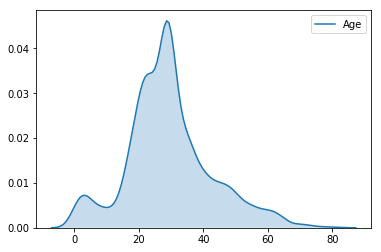

In [27]:
sns.kdeplot(df['Age'],shade = True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
PassengerId    1309 non-null int64
Survived       1309 non-null float64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1309 non-null float64
Embarked       1309 non-null object
Has_Cabin      1309 non-null bool
Title          1309 non-null object
dtypes: bool(1), float64(3), int64(4), object(5)
memory usage: 174.2+ KB


### We have successfully handled all missing values.

##  Binning numerical columns

In [29]:
df['Categorical_age'] = pd.qcut(df['Age'], q=5, labels=False )
df['Categorical_fare']= pd.qcut(df['Fare'], q=5, labels=False)

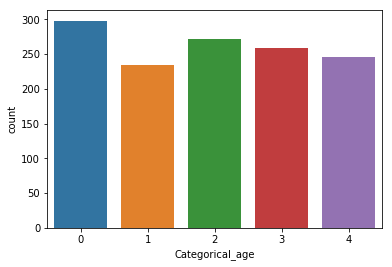

In [30]:
sns.countplot(x='Categorical_age', data=df)

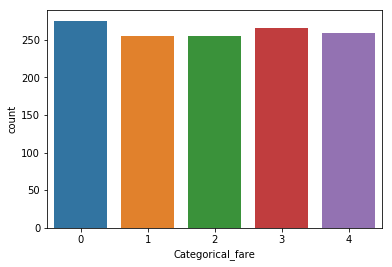

In [31]:
sns.countplot(x='Categorical_fare', data=df)

In [32]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Has_Cabin,Title,Categorical_age,Categorical_fare
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,False,Mr,1,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,True,Mrs,3,4
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,False,Miss,1,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,True,Mrs,3,4
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,False,Mr,3,1


## Drop columns Cabin, Name, Passengerid, Ticket, Age, Fare, SibSp, Parch. 

In [33]:
df = df.drop(['Name','PassengerId','Ticket','Age','Fare','SibSp','Parch'], axis=1)

Losing these columns will not effect survival rate

In [34]:
df.head()

,Survived,Pclass,Sex,Embarked,Has_Cabin,Title,Categorical_age,Categorical_fare
0,0.0,3,male,S,False,Mr,1,0
1,1.0,1,female,C,True,Mrs,3,4
2,1.0,3,female,S,False,Miss,1,1
3,1.0,1,female,S,True,Mrs,3,4
4,0.0,3,male,S,False,Mr,3,1


## Transform all variables into numeric ones 

In [35]:
titanic_data = pd.get_dummies(df)
titanic_data.head()

,Survived,Pclass,Has_Cabin,Categorical_age,Categorical_fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Special
0,0.0,3,False,1,0,0,1,0,0,1,0,0,1,0,0
1,1.0,1,True,3,4,1,0,1,0,0,0,0,0,1,0
2,1.0,3,False,1,1,1,0,0,0,1,0,1,0,0,0
3,1.0,1,True,3,4,1,0,0,0,1,0,0,0,1,0
4,0.0,3,False,3,1,0,1,0,0,1,0,0,1,0,0


## Preparing data

In [36]:
titanic_data.columns

Index(['Survived', 'Pclass', 'Has_Cabin', 'Categorical_age',
       'Categorical_fare', 'Sex_female', 'Sex_male', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Title_Master', 'Title_Miss', 'Title_Mr',
       'Title_Mrs', 'Title_Special'],
      dtype='object')

In [37]:
x = titanic_data[['Pclass', 'Has_Cabin', 'Categorical_age',
       'Categorical_fare', 'Sex_female', 'Sex_male', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Title_Master', 'Title_Miss', 'Title_Mr',
       'Title_Mrs', 'Title_Special']]
y = titanic_data['Survived']

In [38]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.3,random_state=0)

## Training 

In [39]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, Y_train)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

## Prediction 

In [40]:
Y_pred = classifier.predict(X_test)

## Accuracy Score 

In [41]:
import sklearn
sklearn.metrics.accuracy_score(Y_test, Y_pred)

0.6895674300254453

In [42]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(Y_test, Y_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(Y_test, Y_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

Mean Absolute Error:  0.3104325699745547
Mean Squared Error:  0.3104325699745547
Root Mean Squared Error:  0.5571647601693369


In [43]:
df2 = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
df2

,Actual,Predicted
248,1.0,1.0
533,1.0,1.0
459,0.0,0.0
259,1.0,0.0
393,1.0,1.0
298,1.0,0.0
5,0.0,0.0
231,0.0,0.0
330,1.0,0.0
887,1.0,1.0
